In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option("display.max_colwidth",300)
pd.set_option("display.max_column",30)

In [5]:
sales_data = pd.read_csv('Sales Dataset.csv')
sales_data.head()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100


In [8]:
sales_data.tail()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,995,2023-05-16,Male,62,Clothing,1,50,50
996,996,2023-11-17,Male,52,Beauty,3,30,90
997,997,2023-10-29,Female,23,Beauty,4,25,100
998,998,2023-12-05,Female,36,Electronics,3,50,150
999,999,2023-04-12,Male,47,Electronics,4,30,120


In [17]:
sales_data.shape

(1000, 8)

>The sales data has 1000 rows and 8 columns

In [21]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [25]:
sales_data.dtypes

Unnamed: 0           int64
Date                object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [27]:
sales_data.columns

Index(['Unnamed: 0', 'Date', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount'],
      dtype='object')

In [30]:
sales_data.isna().sum()

Unnamed: 0          0
Date                0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [32]:
sales_data.duplicated().sum()

0

In [34]:
sales_data.drop(columns=['Unnamed: 0'], inplace=True)
sales_data.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


In [36]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data.dtypes

Date                datetime64[ns]
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [42]:
sales_data.rename(columns={'Total Amount':'Total Sales'}, inplace=True)
sales_data.columns

Index(['Date', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Sales'],
      dtype='object')

In [82]:
sales_data.describe().style.background_gradient('summer')

,Date,Age,Quantity,Price per Unit,Total Sales
count,1000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2023-07-03 00:25:55.200000256,41.392000,2.514000,179.890000,456.000000
min,2023-01-01 00:00:00,18.000000,1.000000,25.000000,25.000000
25%,2023-04-08 00:00:00,29.000000,1.000000,30.000000,60.000000
50%,2023-06-29 12:00:00,42.000000,3.000000,50.000000,135.000000
75%,2023-10-04 00:00:00,53.000000,4.000000,300.000000,900.000000
max,2024-01-01 00:00:00,64.000000,4.000000,500.000000,2000.000000
std,nan,13.681430,1.132734,189.681356,559.997632


In [92]:
sales_data.describe(include='object')

,Gender,Product Category
count,1000,1000
unique,2,3
top,Female,Clothing
freq,510,351


#### Data Cleaning Summary

* No missing values across all columns.
* `Date` converted to a datetime format for time-based analyses.
* Redundant `Unnamed: 0` (index) column dropped.
* `Total Amount` column renamed to `Total Sales`

#### Initial Descriptive Stats

* **Average Customer Age:** 41.4 years
* **Gender Split:** 510 Female / 490 Male
* **Top Product Category:** Clothing (351 transactions)
* **Avg. Quantity Purchased:** 2.51 items
* **Avg. Spend per Transaction:** \$456.00

#### Let's verify Total Sales = Quantity × Price per Unit for consistency.

In [123]:
sales_data_copy = sales_data.copy()
#sales_data_copy.head().style.background_gradient(cmap='ocean_r')

In [125]:
sales_data_copy['Calculated Total'] = sales_data['Quantity'] * sales_data['Price per Unit']

In [127]:
sales_data_copy['Sales Mismatch'] = sales_data_copy['Total Sales'] != sales_data_copy['Calculated Total']

In [129]:
sales_data_copy.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Sales,Calculated Total,Sales Mismatch
0,2023-11-24,Male,34,Beauty,3,50,150,150,False
1,2023-02-27,Female,26,Clothing,2,500,1000,1000,False
2,2023-01-13,Male,50,Electronics,1,30,30,30,False
3,2023-05-21,Male,37,Clothing,1,500,500,500,False
4,2023-05-06,Male,30,Beauty,2,50,100,100,False


In [147]:
mismatch_count = sales_data_copy['Sales Mismatch'].sum()
if mismatch_count > 0:
    mismatches = sales_data_copy[sales_data_copy['Sales Mismatch']]
else:
    mismatches = None

mistmatch_count, mismatches

(0, None)

>Validation Complete: All entries in the dataset are accurate — the Total Sales for each transaction exactly matches the computed value Quantity × Price per Unit.

### Gender-Based Spending Behavior
Compare average spend per transaction and product preferences across genders.

In [209]:
avg_spend_by_gender = sales_data.groupby('Gender')['Total Sales'].mean().reset_index()
avg_spend_by_gender.style.background_gradient(cmap="Greens")

,Gender,Total Sales
0,Female,456.549020
1,Male,455.428571


In [213]:
sales_by_gender_pc = sales_data.groupby(['Gender', 'Product Category'])['Total Sales']\
                             .sum().reset_index()\
                             .sort_values('Total Sales', ascending=False)

sales_by_gender_pc.style.background_gradient(cmap="Greens")

,Gender,Product Category,Total Sales
1,Female,Clothing,81275
5,Male,Electronics,80170
2,Female,Electronics,76735
0,Female,Beauty,74830
4,Male,Clothing,74305
3,Male,Beauty,68685


## B. Age Group Analysis
Group customers by age brackets (e.g., 18–25, 26–35...) and analyze purchase behavior and product affinity.

In [ ]:
# Create age bins
age_bins = [17, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [244]:
age_bins = [17, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

sales_data['Age Group'] = pd.cut(
    x=sales_data['Age'],
    bins=age_bins,
    labels=age_labels
)

sales_data.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Sales,Age Group
0,2023-11-24,Male,34,Beauty,3,50,150,26-35
1,2023-02-27,Female,26,Clothing,2,500,1000,26-35
2,2023-01-13,Male,50,Electronics,1,30,30,46-55
3,2023-05-21,Male,37,Clothing,1,500,500,36-45
4,2023-05-06,Male,30,Beauty,2,50,100,26-35


In [287]:
# Compute average spend per age group
avg_spend_by_age_group = sales_data.groupby('Age Group', observed=False)['Total Sales'].mean().reset_index()
avg_spend_by_age_group.sort_values('Total Sales', ascending=False).style.background_gradient(cmap='Greens')

,Age Group,Total Sales
0,18-25,500.295858
1,26-35,480.390244
2,36-45,454.801980
3,46-55,439.694323
4,56-65,412.358974


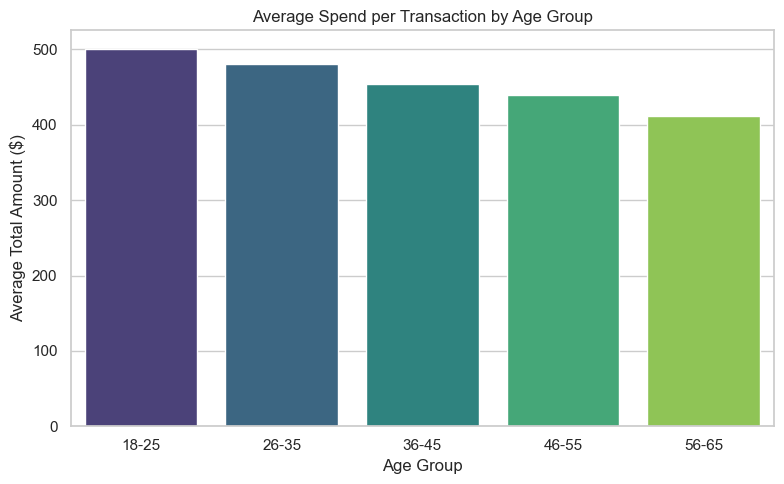

In [269]:
# Plot 1: Average Spend per Age Group
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_spend_by_age_group, 
    x='Age Group', 
    y='Total Sales', 
    hue='Age Group', 
    palette='viridis'
)

plt.title('Average Spend per Transaction by Age Group')
plt.ylabel('Average Total Amount ($)')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

In [281]:
# Compute total spend per product category per age group
category_spend_by_age = sales_data.groupby(['Age Group', 'Product Category'], 
                                           observed=False)['Total Sales'].sum().reset_index()

In [279]:
# Compute total spend per product category per age group
category_spend_by_age = sales_data.groupby(['Age Group', 'Product Category'], 
                                           observed=False)['Total Sales']\
                                  .sum().reset_index()\
                                .sort_values('Total Sales', ascending=False)

category_spend_by_age.style.background_gradient('Greens')


,Age Group,Product Category,Total Sales
4,26-35,Clothing,39975
11,46-55,Electronics,35485
9,46-55,Beauty,34720
8,36-45,Electronics,33915
14,56-65,Electronics,33480
0,18-25,Beauty,31280
3,26-35,Beauty,31240
10,46-55,Clothing,30485
7,36-45,Clothing,29550
13,56-65,Clothing,29060


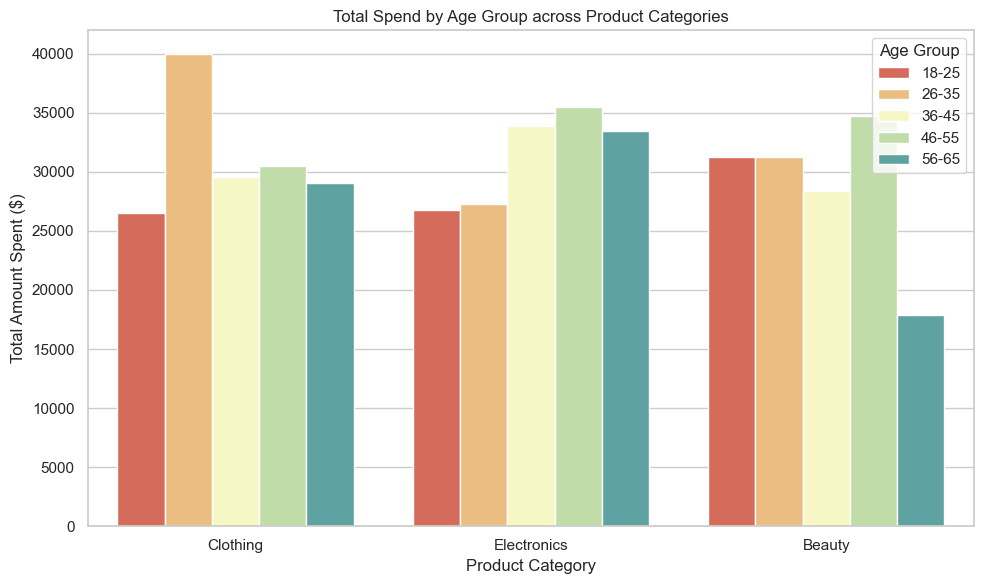

In [276]:
# Plot 2: Product Category Spending by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(
    data=category_spend_by_age, 
    x='Product Category', 
    y='Total Sales', 
    hue='Age Group', 
    palette='Spectral'
)

plt.title('Total Spend by Age Group across Product Categories')
plt.ylabel('Total Amount Spent ($)')
plt.xlabel('Product Category')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [290]:
# Compute total spend per product category per age group
category_spend_by_age = sales_data.groupby(['Age Group', 'Product Category'], 
                                           observed=False)['Total Sales']\
                                  .sum().reset_index()

import plotly.io as pio
pio.renderers.default = 'notebook'
pio.renderers.default = 'iframe_connected'

fig = px.bar(data_frame=category_spend_by_age,
             x='Product Category',
             y='Total Sales',
             color='Age Group',
             title='Total Sales Per Product Category By Gender Ratio')

fig.update_layout(height=500, width=600)
fig.show()

## Time Series Analysis(Monthly Totals by Category over time)

In [305]:
# Extract month from the Date for trend analysis
sales_data['Month'] = sales_data['Date'].dt.to_period('M').astype(str)
sales_data.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Sales,Age Group,Month
0,2023-11-24,Male,34,Beauty,3,50,150,26-35,2023-11
1,2023-02-27,Female,26,Clothing,2,500,1000,26-35,2023-02
2,2023-01-13,Male,50,Electronics,1,30,30,46-55,2023-01
3,2023-05-21,Male,37,Clothing,1,500,500,36-45,2023-05
4,2023-05-06,Male,30,Beauty,2,50,100,26-35,2023-05


In [325]:
# Aggregate total amount spent per product category by month
monthly_trends = sales_data.groupby(['Month', 'Product Category'])['Total Sales'].sum().reset_index()
monthly_trends

,Month,Product Category,Total Sales
0,2023-01,Beauty,12430
1,2023-01,Clothing,13125
2,2023-01,Electronics,9895
3,2023-02,Beauty,14035
4,2023-02,Clothing,14560
5,2023-02,Electronics,15465
6,2023-03,Beauty,10545
7,2023-03,Clothing,15065
8,2023-03,Electronics,3380
9,2023-04,Beauty,11905


In [331]:
# Pivot the table to get product categories as columns
trend_pivot = monthly_trends.pivot(index='Month', columns='Product Category', values='Total Sales').fillna(0)
trend_pivot.style.background_gradient(cmap='summer')

Product Category,Beauty,Clothing,Electronics
Month,,,
2023-01,12430.000000,13125.000000,9895.000000
2023-02,14035.000000,14560.000000,15465.000000
2023-03,10545.000000,15065.000000,3380.000000
2023-04,11905.000000,13940.000000,8025.000000
2023-05,12450.000000,17455.000000,23245.000000
2023-06,10995.000000,10170.000000,15550.000000
2023-07,16090.000000,8250.000000,11125.000000
2023-08,9790.000000,12455.000000,14715.000000
2023-09,6320.000000,9975.000000,7325.000000


<Figure size 1400x600 with 0 Axes>

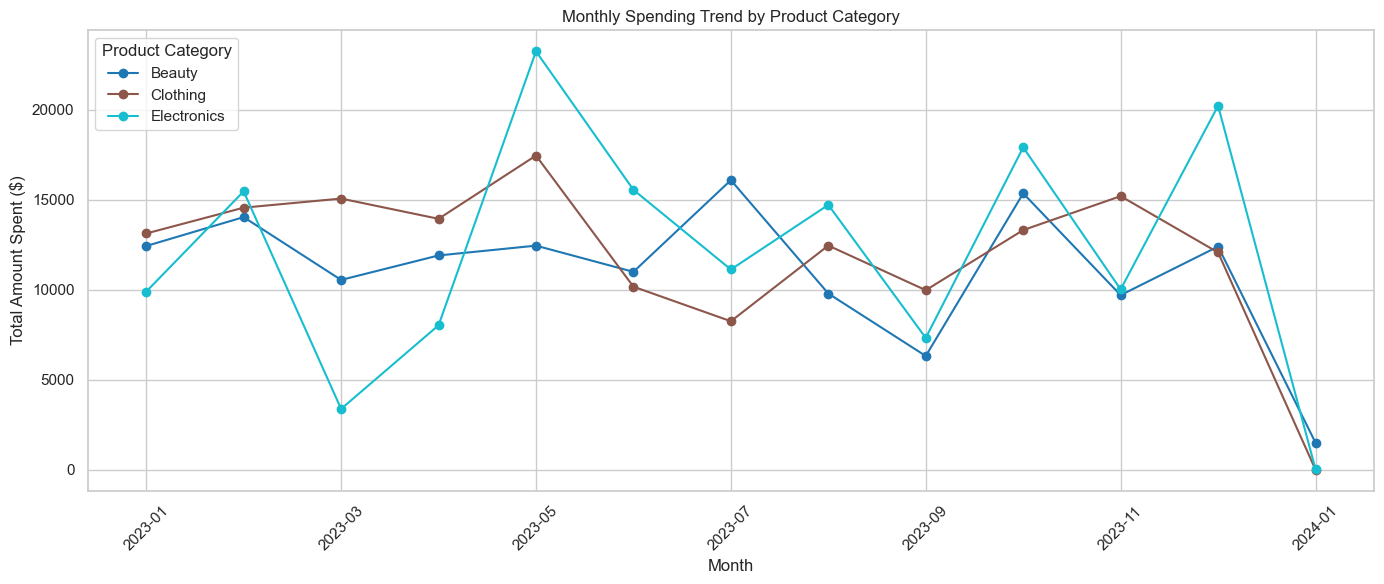

In [329]:
# Plot the trend over time
plt.figure(figsize=(14, 6))
trend_pivot.plot(
    marker='o', 
    figsize=(14, 6), 
    colormap='tab10'
)
plt.title('Monthly Spending Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Product Category')
plt.show()

In [352]:
import plotly.io as pio
pio.renderers.default = 'notebook'
pio.renderers.default = 'iframe_connected'


fig = px.line(
    trend_pivot,
    x=trend_pivot.index,
    y=trend_pivot.columns,
    title='Monthly Spending Trend by Product Category',
    markers=True
)

fig.update_layout(
    height=500, 
    width=800,
    yaxis_title = 'Total Sales($)'
)
fig.show()

## Seasonality & Sales Peaks. Just write the code. No output

In [362]:
# Extract month from date for seasonality analysis
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Month Name'] = sales_data['Date'].dt.strftime('%B')
sales_data.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Sales,Age Group,Month,Month Name
0,2023-11-24,Male,34,Beauty,3,50,150,26-35,11,November
1,2023-02-27,Female,26,Clothing,2,500,1000,26-35,2,February
2,2023-01-13,Male,50,Electronics,1,30,30,46-55,1,January
3,2023-05-21,Male,37,Clothing,1,500,500,36-45,5,May
4,2023-05-06,Male,30,Beauty,2,50,100,26-35,5,May


In [372]:
# Compute total monthly sales
month_list = ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']

monthly_sales = sales_data.groupby('Month Name')['Total Sales'].sum().reindex(month_list).reset_index()
monthly_sales

,Month Name,Total Sales
0,January,36980
1,February,44060
2,March,28990
3,April,33870
4,May,53150
5,June,36715
6,July,35465
7,August,36960
8,September,23620
9,October,46580


In [380]:
# Compute category-specific monthly sales
monthly_category_sales = sales_data.groupby(['Month Name', 'Product Category'])\
                            ['Total Sales'].sum().reset_index()
monthly_category_sales

,Month Name,Product Category,Total Sales
0,April,Beauty,11905
1,April,Clothing,13940
2,April,Electronics,8025
3,August,Beauty,9790
4,August,Clothing,12455
5,August,Electronics,14715
6,December,Beauty,12400
7,December,Clothing,12070
8,December,Electronics,20220
9,February,Beauty,14035


In [384]:
category_list = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

monthly_category_sales['Month Name'] = pd.Categorical(
    values=monthly_category_sales['Month Name'],
    categories=category_list,
    ordered=True
)

monthly_category_sales = monthly_category_sales.sort_values('Month Name')
monthly_category_sales

,Month Name,Product Category,Total Sales
14,January,Electronics,9925
13,January,Clothing,13125
12,January,Beauty,13930
11,February,Electronics,15465
10,February,Clothing,14560
9,February,Beauty,14035
21,March,Beauty,10545
23,March,Electronics,3380
22,March,Clothing,15065
0,April,Beauty,11905


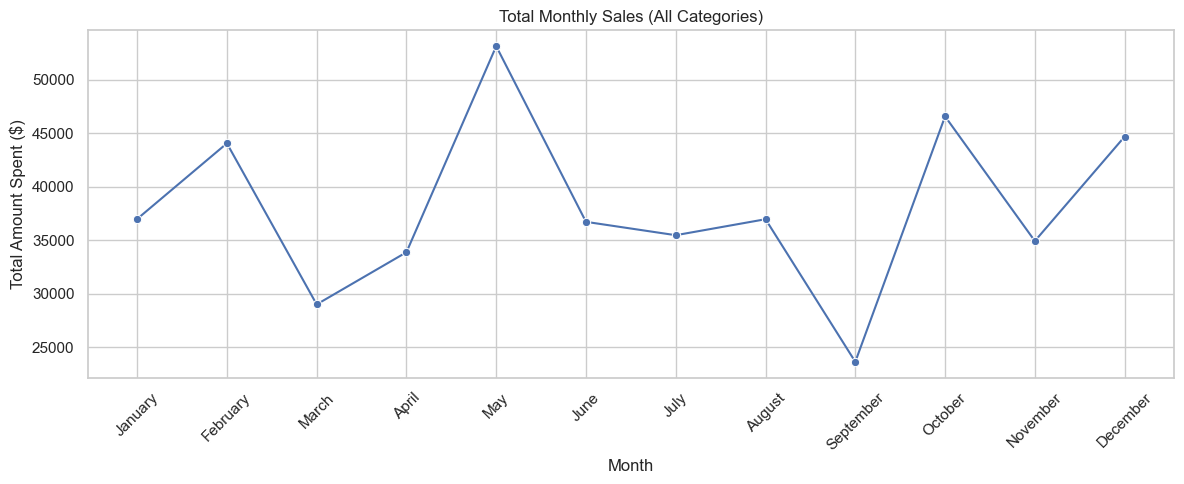

In [386]:
# Plot 1: Total Sales per Month
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=monthly_sales, 
    x='Month Name', 
    y='Total Sales', 
    marker='o'
)
plt.title('Total Monthly Sales (All Categories)')
plt.ylabel('Total Amount Spent ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

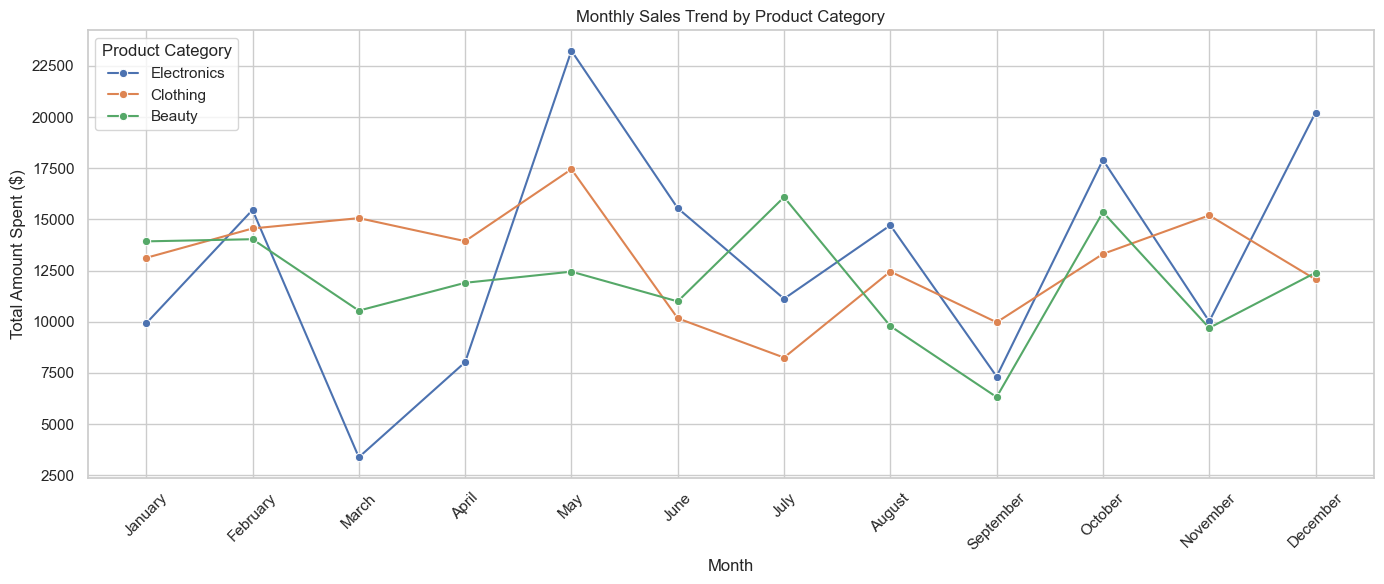

In [390]:
# Plot 2: Monthly Sales by Product Category
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_category_sales, 
    x='Month Name', 
    y='Total Sales', 
    hue='Product Category', 
    marker='o'
)
plt.title('Monthly Sales Trend by Product Category')
plt.ylabel('Total Amount Spent ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Product Category')
plt.show()

In [398]:
monthly_category_sales.head()

,Month Name,Product Category,Total Sales
14,January,Electronics,9925
13,January,Clothing,13125
12,January,Beauty,13930
11,February,Electronics,15465
10,February,Clothing,14560


In [404]:
# Pivot the table to get product categories as columns
cat_trend_pivot = monthly_category_sales.pivot(
    index='Month Name', 
    columns='Product Category', 
    values='Total Sales'
).fillna(0)

cat_trend_pivot.style.background_gradient(cmap='summer')

Product Category,Beauty,Clothing,Electronics
Month Name,,,
January,13930,13125,9925
February,14035,14560,15465
March,10545,15065,3380
April,11905,13940,8025
May,12450,17455,23245
June,10995,10170,15550
July,16090,8250,11125
August,9790,12455,14715
September,6320,9975,7325


In [408]:
pio.renderers.default = 'notebook'
pio.renderers.default = 'iframe_connected'

fig = px.line(
    data_frame=cat_trend_pivot,
    x=cat_trend_pivot.index,
    y=cat_trend_pivot.columns,
    title='Monthly Sales Trend by Product Category',
    markers=True
)

fig.update_layout(
    height=500, 
    width=800,
    yaxis_title = 'Total Sales($)'
)

fig.show()

## High-Value Customer Profiling

In [424]:
# Aggregate total spend per customer (Gender + Age used as proxy ID)
customer_spend = sales_data.groupby(['Gender', 'Age'])['Total Sales'].sum().reset_index()
customer_spend = customer_spend.sort_values(by='Total Sales', ascending=False)

top_customers = customer_spend.head(10)
top_customers

,Gender,Age,Total Sales
16,Female,34,12050
8,Female,26,10375
25,Female,43,10260
80,Male,51,8795
51,Male,22,8275
60,Male,31,8200
92,Male,63,8045
0,Female,18,7940
72,Male,43,7710
75,Male,46,7710


In [418]:
# Analyze preferred categories of top spenders
top_customer_profiles = sales_data.merge(top_customers, on=['Gender', 'Age'], suffixes=('', '_Total'))
top_customer_profiles.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Sales,Age Group,Month,Month Name,Total Sales_Total
0,2023-02-27,Female,26,Clothing,2,500,1000,26-35,2,February,10375
1,2023-03-13,Male,46,Clothing,2,25,50,46-55,3,March,7710
2,2023-12-13,Male,63,Electronics,2,300,600,56-65,12,December,8045
3,2023-08-05,Male,22,Electronics,3,500,1500,18-25,8,August,8275
4,2023-11-05,Male,22,Clothing,3,300,900,18-25,11,November,8275


In [430]:
preferred_categories = top_customer_profiles.groupby(['Gender', 'Age', 'Product Category'])\
                            ['Total Sales'].sum().reset_index()
preferred_categories

,Gender,Age,Product Category,Total Sales
0,Female,18,Beauty,3195
1,Female,18,Clothing,2575
2,Female,18,Electronics,2170
3,Female,26,Beauty,1715
4,Female,26,Clothing,6960
5,Female,26,Electronics,1700
6,Female,34,Beauty,5350
7,Female,34,Clothing,1300
8,Female,34,Electronics,5400
9,Female,43,Beauty,2425


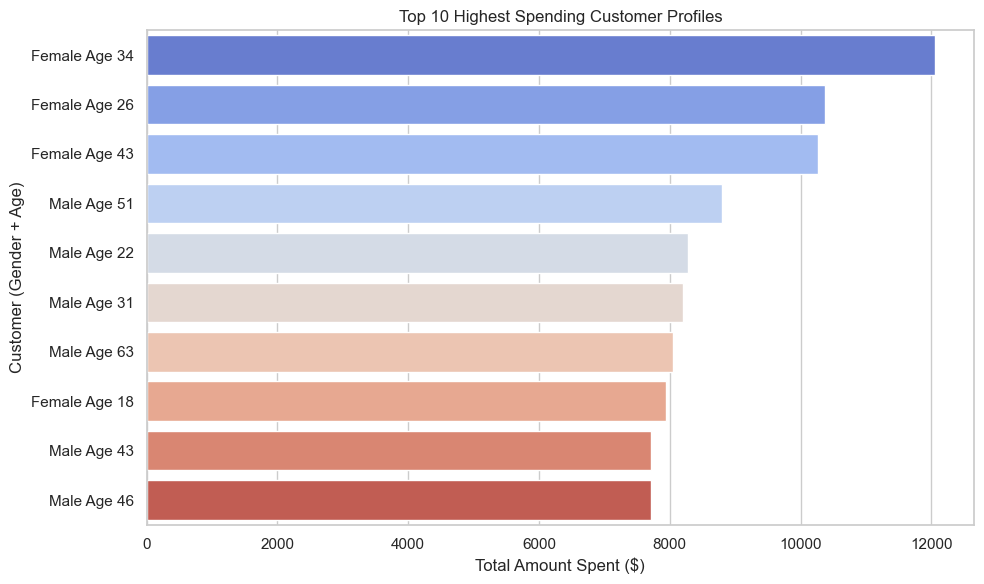

In [439]:
# Plot 1: Top 10 Customer Profiles by Total Spend
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_customers,
    x='Total Sales',
    y=top_customers['Gender'] + " Age " + top_customers['Age'].astype(str),
    hue=top_customers['Gender'] + " Age " + top_customers['Age'].astype(str),
    palette='coolwarm'
)
plt.title('Top 10 Highest Spending Customer Profiles')
plt.xlabel('Total Amount Spent ($)')
plt.ylabel('Customer (Gender + Age)')
plt.tight_layout()
plt.show()

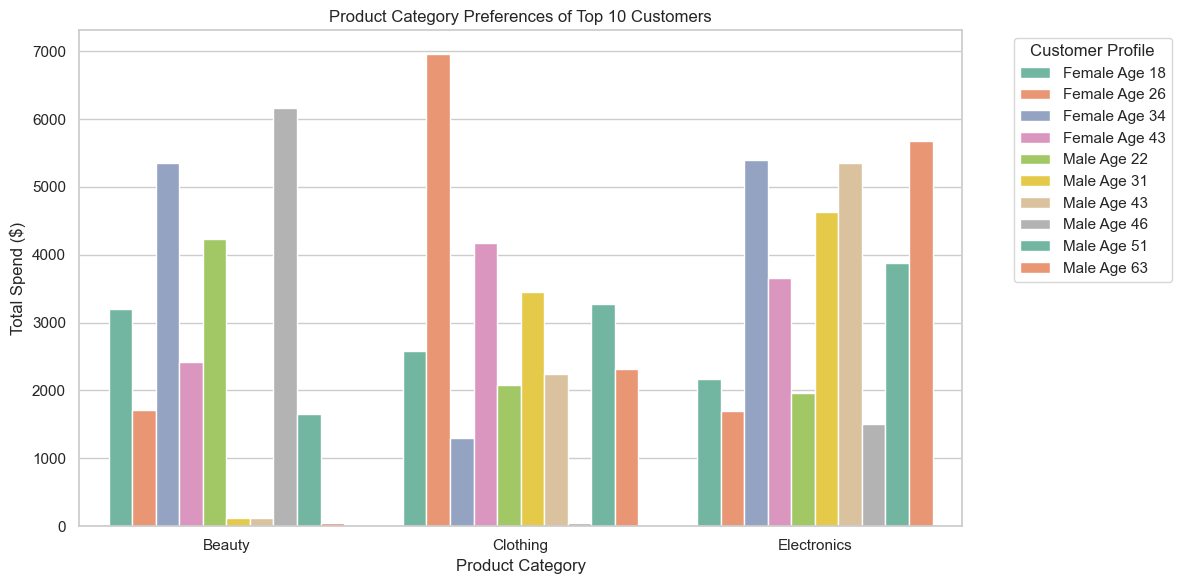

In [441]:
# Plot 2: Preferred Categories of Top Customers
plt.figure(figsize=(12, 6))
sns.barplot(
    data=preferred_categories,
    x='Product Category',
    y='Total Sales',
    hue=preferred_categories['Gender'] + " Age " + preferred_categories['Age'].astype(str),
    palette='Set2'
)
plt.title('Product Category Preferences of Top 10 Customers')
plt.ylabel('Total Spend ($)')
plt.xlabel('Product Category')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()